In [275]:
#Import all the necessary packages

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer

In [276]:
df = pd.read_csv("train.csv", index_col=0)
df.shape

(891, 11)

## 1. Data Exploration


In [277]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


For each column, investigate whether it has any apparent influence on survival:

In [278]:
# Base survival rate:
df["Survived"].value_counts(normalize=True).round(3)

0    0.616
1    0.384
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

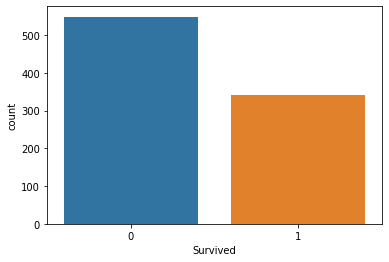

In [279]:
sns.countplot(df['Survived'])

In [280]:
df['Survived'].groupby(df["Pclass"]).value_counts(normalize=True).round(3)

Pclass  Survived
1       1           0.630
        0           0.370
2       0           0.527
        1           0.473
3       0           0.758
        1           0.242
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

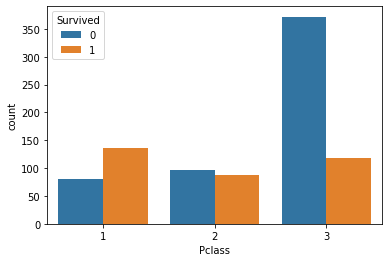

In [281]:
sns.countplot(df['Pclass'], hue=df['Survived'])

We see that PClass seems to have a marked effect on survival rate.

In [282]:
df['Survived'].groupby(df["Sex"]).value_counts(normalize=True).round(3)

Sex     Survived
female  1           0.742
        0           0.258
male    0           0.811
        1           0.189
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

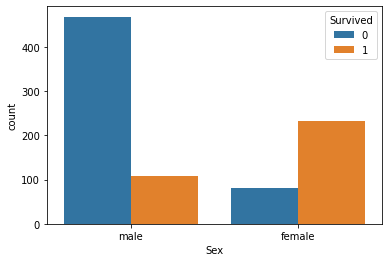

In [283]:
sns.countplot(df['Sex'], hue=df['Survived'])

In [284]:
df['Survived'].groupby(df["SibSp"]).value_counts(normalize=True).round(3)

SibSp  Survived
0      0           0.655
       1           0.345
1      1           0.536
       0           0.464
2      0           0.536
       1           0.464
3      0           0.750
       1           0.250
4      0           0.833
       1           0.167
5      0           1.000
8      0           1.000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

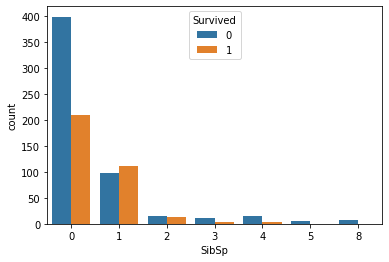

In [285]:
sns.countplot(df['SibSp'], hue=df['Survived'])

In [286]:
df['Survived'].groupby(df["Parch"]).value_counts(normalize=True).round(3)

Parch  Survived
0      0           0.656
       1           0.344
1      1           0.551
       0           0.449
2      0           0.500
       1           0.500
3      1           0.600
       0           0.400
4      0           1.000
5      0           0.800
       1           0.200
6      0           1.000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Parch', ylabel='count'>

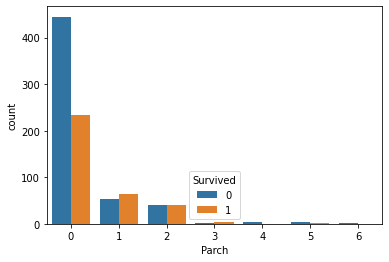

In [287]:
sns.countplot(df['Parch'], hue=df['Survived'])

In [288]:
df['Survived'].groupby(df["Fare"]).value_counts(normalize=True).round(3)

Fare      Survived
0.0000    0           0.933
          1           0.067
4.0125    0           1.000
5.0000    0           1.000
6.2375    0           1.000
                      ...  
247.5208  1           0.500
262.3750  1           1.000
263.0000  0           0.500
          1           0.500
512.3292  1           1.000
Name: Survived, Length: 330, dtype: float64

In [289]:
df['Survived'].groupby(df["Embarked"]).value_counts(normalize=True).round(3)

Embarked  Survived
C         1           0.554
          0           0.446
Q         0           0.610
          1           0.390
S         0           0.663
          1           0.337
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

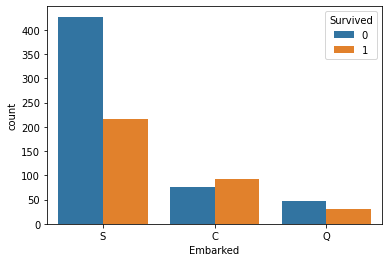

In [290]:
sns.countplot(df['Embarked'], hue=df['Survived'])

In [291]:
df['Survived'].groupby(df["Cabin"].astype(str).str[0]).value_counts(normalize=True).round(3)

Cabin  Survived
A      0           0.533
       1           0.467
B      1           0.745
       0           0.255
C      1           0.593
       0           0.407
D      1           0.758
       0           0.242
E      1           0.750
       0           0.250
F      1           0.615
       0           0.385
G      0           0.500
       1           0.500
T      0           1.000
n      0           0.700
       1           0.300
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Cabin', ylabel='count'>

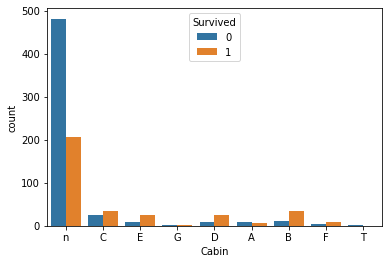

In [292]:
sns.countplot(df["Cabin"].astype(str).str[0], hue=df['Survived'])

In [293]:
df['Survived'].groupby(df["Name"].str.len()).value_counts(normalize=True).round(3)


Name  Survived
12    0           0.500
      1           0.500
13    0           0.500
      1           0.500
14    0           0.667
                  ...  
57    1           0.500
61    1           1.000
65    1           1.000
67    1           1.000
82    1           1.000
Name: Survived, Length: 87, dtype: float64

In [294]:
df["Name"].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [295]:
df['Survived'].groupby(df["Name"].apply(lambda x: x.split(",")[1]).apply(lambda x: x.split()[0])).value_counts(normalize=True).round(3)


Name       Survived
Capt.      0           1.000
Col.       0           0.500
           1           0.500
Don.       0           1.000
Dr.        0           0.571
           1           0.429
Jonkheer.  0           1.000
Lady.      1           1.000
Major.     0           0.500
           1           0.500
Master.    1           0.575
           0           0.425
Miss.      1           0.698
           0           0.302
Mlle.      1           1.000
Mme.       1           1.000
Mr.        0           0.843
           1           0.157
Mrs.       1           0.792
           0           0.208
Ms.        1           1.000
Rev.       0           1.000
Sir.       1           1.000
the        1           1.000
Name: Survived, dtype: float64

## Train-Test-Split

In [308]:
#We split the dataframe into training and testing data, looking to predict whether or not a given passenger survived.

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis=1), df['Survived'])


## Feature Engineer
1. Apply column transformations (OneHot, Binning, Custom funcs)
2. Scale everything
3. Train a model


In [297]:
X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [378]:
def title_from_name(df):  # input is a df
    """Returns the title if a name is formatted <Surname, Title Name...>"""
    title = df.iloc[:,0].apply(lambda x: str(x).split(",")[1]).apply(lambda x: x.split()[0])
    return title.values.reshape(-1, 1)

In [379]:
def cabin_level(df): 
    """Returns letter signifying cabin level from Cabin name, or n for NaN """
   
    level = df.iloc[:,0].apply(lambda x: str(x)[0])
    result= level.values.reshape(-1, 1)
    
    return result
    #return pd.DataFrame(level)
    

In [380]:
cabin_level(X_train[["Cabin"]]).shape

(668, 1)

In [381]:
title_from_name(X_train[['Name']]).shape


(668, 1)

In [382]:
def categorise_family (df): #input is a df
    fam_cat = df.iloc[:,0].replace({0 : 'none', 1:'one', 2 : 'more', 3: 'more', 4: 'more',5: 'more',6: 'more',7: 'more',8: 'more',9: 'more',10: 'more'})
    return fam_cat.values.reshape(-1, 1)

In [383]:
categorise_family(X_train[['SibSp']]).shape

(668, 1)

In [384]:
X_train.shape

(668, 10)

In [387]:
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy='median')),
    ('scaler_num', MinMaxScaler())])

categorical_features = ['Embarked', 'Sex', 'Pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

family_features = ['SibSp', 'Parch']
family_transformer = Pipeline(steps=[
    ('family_cat', FunctionTransformer(categorise_family)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

name_feat = ['Name']
name_transformer = Pipeline(steps=[
    ('title_extract', FunctionTransformer(title_from_name)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

cabin_feat = ['Cabin']
cabin_transformer = Pipeline(steps=[
    ('cabin_level', FunctionTransformer(cabin_level)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('fam', family_transformer, family_features),
        ('name', name_transformer, name_feat),
        ('cabin', cabin_transformer, cabin_feat)
    ])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.


X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed =  preprocessor.transform(X_test) # imutes median age from X_train
X_train_preprocessed.shape

(668, 36)

In [392]:
X_train_preprocessed

<668x36 sparse matrix of type '<class 'numpy.float64'>'
	with 5331 stored elements in Compressed Sparse Row format>

In [388]:
X_test_preprocessed.shape

(223, 36)

In [393]:
log_reg = LogisticRegression()
log_reg.fit(X_train_preprocessed,y_train)
log_reg.score(X_train_preprocessed, y_train).round(3)

0.847

In [395]:
log_reg.score(X_test_preprocessed, y_test).round(3)

0.789

In [391]:
param_grid = {'C': [0.1, 1.0, 10, 100],
}

grid_search = GridSearchCV(log_reg, param_grid, cv=10)
grid_search.fit(X_train_preprocessed, y_train)

print(("best logistic regression from grid search: %.3f"
       % grid_search.score(X_train_preprocessed, y_train)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

best logistic regression from grid search: 0.847


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [423]:
ran_forest = RandomForestClassifier(max_depth=10, min_samples_split = 10, n_estimators=900)
ran_forest.fit(X_train_preprocessed, y_train)
ran_forest.score(X_train_preprocessed, y_train).round(3)


0.894

In [425]:
ran_forest.score(X_test_preprocessed, y_test).round(3)

0.807

In [422]:
#param_grid = {"max_depth": list(range(1, 11)), 'min_samples_split': list(range(10, 30, 4))}

#search = GridSearchCV(ran_forest, param_grid, cv = 5, verbose=50, n_jobs=-1)
#search.fit(X_train_preprocessed, y_train)
#print("Best parameter (CV score=%0.3f):" % search.best_score_)
#print(search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=1, min_samples_split=10 ...............................
[CV] ... max_depth=1, min_samples_split=10, score=0.784, total=   2.5s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV] ... max_depth=1, min_samples_split=10, score=0.813, total=   2.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV] ... max_depth=1, min_samples_split=10, score=0.769, total=   2.7s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.6s remaining:    0.0s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV] ... max_depth=1, min_samples_split=10, score=0.812, total=   2.7s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

[CV] ... max_depth=2, min_samples_split=18, score=0.813, total=   3.3s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:  1.9min remaining:    0.0s
[CV] max_depth=2, min_samples_split=18 ...............................
[CV] ... max_depth=2, min_samples_split=18, score=0.769, total=   3.1s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:  1.9min remaining:    0.0s
[CV] max_depth=2, min_samples_split=18 ...............................
[CV] ... max_depth=2, min_samples_split=18, score=0.812, total=   3.2s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:  2.0min remaining:    0.0s
[CV] max_depth=2, min_samples_split=18 ...............................
[CV] ... max_depth=2, min_samples_split=18, score=0.812, total=   3.2s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.0min remaining:    0.0s
[CV] max_depth=2, min_samples_split=22 ...............................
[CV] ... max_depth=2, min_samples_split=22, score=0.784, total=   3.2s
[Parallel(n_jobs=1)]: Done  41 out of  41

[CV] ... max_depth=4, min_samples_split=18, score=0.813, total=   8.1s
[CV] max_depth=4, min_samples_split=18 ...............................
[CV] ... max_depth=4, min_samples_split=18, score=0.865, total=  12.0s
[CV] max_depth=4, min_samples_split=18 ...............................
[CV] ... max_depth=4, min_samples_split=18, score=0.820, total=   6.3s
[CV] max_depth=4, min_samples_split=22 ...............................
[CV] ... max_depth=4, min_samples_split=22, score=0.828, total=  13.0s
[CV] max_depth=4, min_samples_split=22 ...............................
[CV] ... max_depth=4, min_samples_split=22, score=0.828, total=  13.6s
[CV] max_depth=4, min_samples_split=22 ...............................
[CV] ... max_depth=4, min_samples_split=22, score=0.813, total=   7.3s
[CV] max_depth=4, min_samples_split=22 ...............................
[CV] ... max_depth=4, min_samples_split=22, score=0.865, total=   3.7s
[CV] max_depth=4, min_samples_split=22 ...............................
[CV] .

[CV] ... max_depth=6, min_samples_split=26, score=0.843, total=   3.2s
[CV] max_depth=6, min_samples_split=26 ...............................
[CV] ... max_depth=6, min_samples_split=26, score=0.836, total=   3.2s
[CV] max_depth=6, min_samples_split=26 ...............................
[CV] ... max_depth=6, min_samples_split=26, score=0.799, total=   3.2s
[CV] max_depth=6, min_samples_split=26 ...............................
[CV] ... max_depth=6, min_samples_split=26, score=0.872, total=   3.2s
[CV] max_depth=6, min_samples_split=26 ...............................
[CV] ... max_depth=6, min_samples_split=26, score=0.827, total=   3.2s
[CV] max_depth=7, min_samples_split=10 ...............................
[CV] ... max_depth=7, min_samples_split=10, score=0.851, total=   3.4s
[CV] max_depth=7, min_samples_split=10 ...............................
[CV] ... max_depth=7, min_samples_split=10, score=0.851, total=   4.1s
[CV] max_depth=7, min_samples_split=10 ...............................
[CV] .

[CV] ... max_depth=9, min_samples_split=10, score=0.872, total=   3.6s
[CV] max_depth=9, min_samples_split=10 ...............................
[CV] ... max_depth=9, min_samples_split=10, score=0.842, total=   3.6s
[CV] max_depth=9, min_samples_split=14 ...............................
[CV] ... max_depth=9, min_samples_split=14, score=0.858, total=   3.5s
[CV] max_depth=9, min_samples_split=14 ...............................
[CV] ... max_depth=9, min_samples_split=14, score=0.843, total=   3.6s
[CV] max_depth=9, min_samples_split=14 ...............................
[CV] ... max_depth=9, min_samples_split=14, score=0.776, total=   3.6s
[CV] max_depth=9, min_samples_split=14 ...............................
[CV] ... max_depth=9, min_samples_split=14, score=0.872, total=   3.6s
[CV] max_depth=9, min_samples_split=14 ...............................
[CV] ... max_depth=9, min_samples_split=14, score=0.842, total=   3.5s
[CV] max_depth=9, min_samples_split=18 ...............................
[CV] .

## Result of above Gridsearch:
Best parameter (CV score=0.846):
{'max_depth': 10, 'min_samples_split': 10}

ValueError: Invalid parameter imputer for estimator Pipeline(memory=None,
         steps=[('imputer_num',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('scaler_num', MinMaxScaler(copy=True, feature_range=(0, 1)))],
         verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.